<a href="https://colab.research.google.com/github/profliuhao/CSIT599/blob/main/CSIT599_nn_fundamentals_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks Fundamentals: From Perceptrons to Deep Learning

## Learning Objectives

By the end of this notebook, you will:
1. **Understand** the mathematical foundations of neural networks
2. **Implement** a perceptron and multi-layer neural network from scratch
3. **Master** forward propagation and backpropagation algorithms
4. **Explore** different activation and loss functions
5. **Visualize** the training process and network behavior
6. **Apply** gradient descent optimization

## Module Overview

This notebook is designed for a 2-week intensive study:
- **Week 1**: Perceptrons, activation functions, forward propagation
- **Week 2**: Backpropagation, gradient descent, training neural networks

---

## Part 1: Setup and Imports

Let's begin by importing the necessary libraries. We'll use only NumPy for our neural network implementation and Matplotlib for visualizations.

In [ ]:
%pip install matplotlib

In [ ]:
# Import required libraries
import numpy as np                   # For numerical computations
import matplotlib.pyplot as plt      # For plotting and visualizations
from matplotlib import cm           # For colormap in visualizations
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import warnings                     # To suppress warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for inline display
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

print("Setup complete! NumPy version:", np.__version__)

Setup complete! NumPy version: 2.0.2


## Part 2: The Perceptron - Foundation of Neural Networks

### 2.1 Mathematical Foundation

A **perceptron** is the simplest form of a neural network. It takes multiple inputs, applies weights to them, adds a bias, and produces an output through an activation function.

**Mathematical formulation:**
$$z = \sum_{i=1}^{n} w_i x_i + b = \mathbf{w}^T\mathbf{x} + b$$
$$y = f(z)$$

Where:
- $\mathbf{x}$ = input vector
- $\mathbf{w}$ = weight vector
- $b$ = bias term
- $f$ = activation function
- $y$ = output

In [ ]:
class Perceptron:
    """
    A simple perceptron implementation from scratch.
    This is the building block of neural networks.
    """

    def __init__(self, n_features, learning_rate=0.01):
        """
        Initialize the perceptron with random weights.

        Parameters:
        -----------
        n_features : int
            Number of input features
        learning_rate : float
            Learning rate for weight updates (default: 0.01)
        """
        # Initialize weights randomly from a normal distribution
        # Small random values prevent saturation of neurons
        self.weights = np.random.randn(n_features) * 0.1

        # Initialize bias to zero
        self.bias = 0.0

        # Store learning rate for gradient descent
        self.learning_rate = learning_rate

        # Store training history for visualization
        self.loss_history = []

    def activation(self, z):
        """
        Step activation function (threshold at 0).
        Returns 1 if z >= 0, else 0.
        """
        return 1 if z >= 0 else 0

    def forward(self, X):
        """
        Forward propagation through the perceptron.

        Parameters:
        -----------
        X : numpy array of shape (n_samples, n_features)
            Input data

        Returns:
        --------
        predictions : numpy array of shape (n_samples,)
            Binary predictions (0 or 1)
        """
        # Calculate linear combination: z = w^T * x + b
        z = np.dot(X, self.weights) + self.bias

        # Apply activation function element-wise
        predictions = np.array([self.activation(zi) for zi in z])

        return predictions

    def train(self, X, y, epochs=100):
        """
        Train the perceptron using the perceptron learning rule.

        Parameters:
        -----------
        X : numpy array of shape (n_samples, n_features)
            Training data
        y : numpy array of shape (n_samples,)
            Target labels (0 or 1)
        epochs : int
            Number of training iterations
        """
        n_samples = X.shape[0]

        for epoch in range(epochs):
            total_loss = 0

            # Iterate through each training example
            for i in range(n_samples):
                # Get current sample
                xi = X[i]
                yi = y[i]

                # Forward pass: compute prediction
                z = np.dot(xi, self.weights) + self.bias
                y_pred = self.activation(z)

                # Calculate error
                error = yi - y_pred
                total_loss += error ** 2

                # Update weights using perceptron learning rule
                # w = w + learning_rate * error * x
                self.weights += self.learning_rate * error * xi

                # Update bias
                # b = b + learning_rate * error
                self.bias += self.learning_rate * error

            # Store average loss for this epoch
            avg_loss = total_loss / n_samples
            self.loss_history.append(avg_loss)

            # Print progress every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

# Create a simple 2D dataset for visualization
def create_linear_dataset(n_samples=100):
    """
    Create a linearly separable 2D dataset for demonstration.
    """
    # Generate random points
    X = np.random.randn(n_samples, 2)

    # Create labels based on a linear boundary
    y = (X[:, 0] + X[:, 1] > 0).astype(int)

    return X, y

# Generate dataset
X_train, y_train = create_linear_dataset(200)

# Train perceptron
perceptron = Perceptron(n_features=2, learning_rate=0.1)
perceptron.train(X_train, y_train, epochs=50)

Epoch 10/50, Loss: 0.0000
Epoch 20/50, Loss: 0.0000
Epoch 30/50, Loss: 0.0000
Epoch 40/50, Loss: 0.0000
Epoch 50/50, Loss: 0.0000


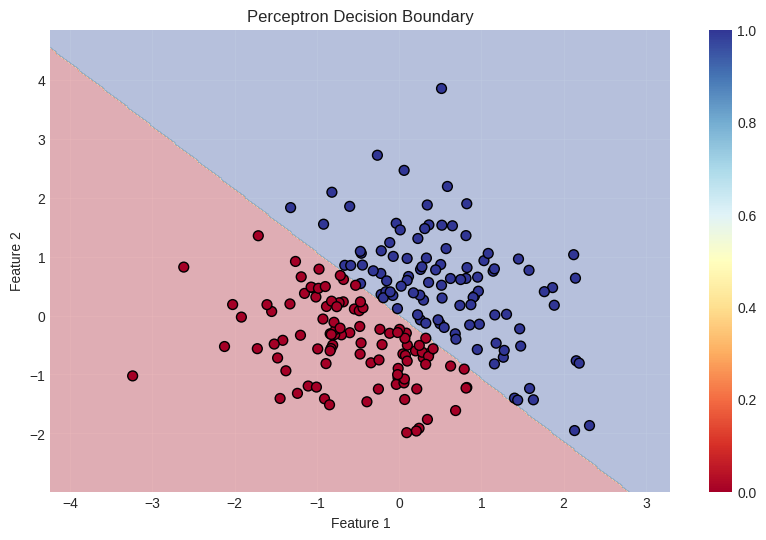

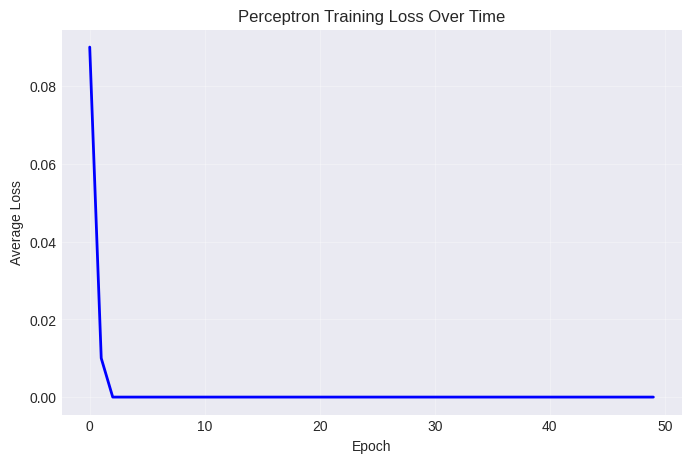

In [ ]:
# Visualize the perceptron decision boundary
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """
    Plot the decision boundary of a binary classifier.
    """
    plt.figure(figsize=(10, 6))

    # Create a mesh grid
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh grid
    Z = model.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                         edgecolor='black', s=50)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot results
plot_decision_boundary(perceptron, X_train, y_train,
                      "Perceptron Decision Boundary")

# Plot loss history
plt.figure(figsize=(8, 5))
plt.plot(perceptron.loss_history, 'b-', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Perceptron Training Loss Over Time')
plt.grid(True, alpha=0.3)
plt.show()

## Part 3: Activation Functions

### 3.1 Why Activation Functions?

Activation functions introduce **non-linearity** into neural networks, allowing them to learn complex patterns. Without activation functions, even deep networks would only be able to learn linear transformations.

### 3.2 Common Activation Functions

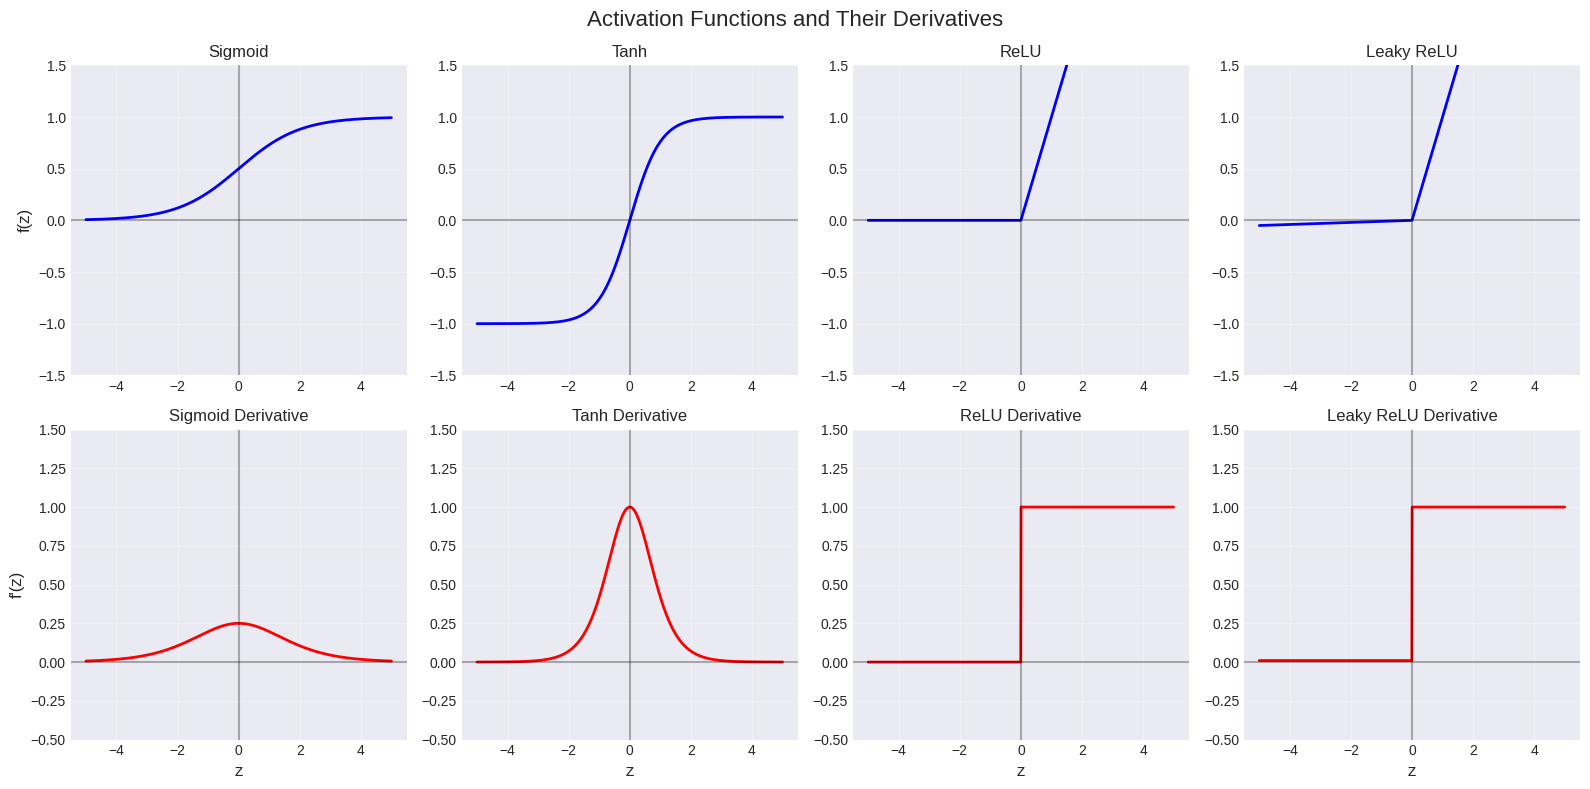

In [ ]:
class ActivationFunctions:
    """
    Collection of activation functions and their derivatives.
    Each function includes both forward pass and gradient computation.
    """

    @staticmethod
    def sigmoid(z):
        """
        Sigmoid activation function: σ(z) = 1 / (1 + e^(-z))
        Maps input to range (0, 1)
        """
        # Clip values to prevent overflow in exp
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def sigmoid_derivative(z):
        """
        Derivative of sigmoid: σ'(z) = σ(z) * (1 - σ(z))
        """
        s = ActivationFunctions.sigmoid(z)
        return s * (1 - s)

    @staticmethod
    def tanh(z):
        """
        Hyperbolic tangent: tanh(z) = (e^z - e^(-z)) / (e^z + e^(-z))
        Maps input to range (-1, 1)
        """
        return np.tanh(z)

    @staticmethod
    def tanh_derivative(z):
        """
        Derivative of tanh: tanh'(z) = 1 - tanh²(z)
        """
        return 1 - np.tanh(z) ** 2

    @staticmethod
    def relu(z):
        """
        Rectified Linear Unit: ReLU(z) = max(0, z)
        Most popular activation in modern deep learning
        """
        return np.maximum(0, z)

    @staticmethod
    def relu_derivative(z):
        """
        Derivative of ReLU: 1 if z > 0, else 0
        """
        return (z > 0).astype(float)

    @staticmethod
    def leaky_relu(z, alpha=0.01):
        """
        Leaky ReLU: allows small gradient when z < 0
        f(z) = z if z > 0, else alpha * z
        """
        return np.where(z > 0, z, alpha * z)

    @staticmethod
    def leaky_relu_derivative(z, alpha=0.01):
        """
        Derivative of Leaky ReLU
        """
        return np.where(z > 0, 1, alpha)

    @staticmethod
    def softmax(z):
        """
        Softmax function for multi-class classification
        Converts logits to probabilities that sum to 1
        """
        # Subtract max for numerical stability
        exp_z = np.exp(z - np.max(z, axis=-1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=-1, keepdims=True)

# Visualize activation functions
def plot_activation_functions():
    """
    Create visualization of different activation functions and their derivatives.
    """
    x = np.linspace(-5, 5, 1000)
    af = ActivationFunctions()

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    fig.suptitle('Activation Functions and Their Derivatives', fontsize=16)

    # Define functions to plot
    functions = [
        ('Sigmoid', af.sigmoid, af.sigmoid_derivative),
        ('Tanh', af.tanh, af.tanh_derivative),
        ('ReLU', af.relu, af.relu_derivative),
        ('Leaky ReLU', af.leaky_relu, af.leaky_relu_derivative)
    ]

    for idx, (name, func, deriv) in enumerate(functions):
        # Plot activation function
        axes[0, idx].plot(x, func(x), 'b-', linewidth=2)
        axes[0, idx].set_title(f'{name}')
        axes[0, idx].grid(True, alpha=0.3)
        axes[0, idx].set_ylim(-1.5, 1.5)
        axes[0, idx].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[0, idx].axvline(x=0, color='k', linestyle='-', alpha=0.3)

        # Plot derivative
        axes[1, idx].plot(x, deriv(x), 'r-', linewidth=2)
        axes[1, idx].set_title(f'{name} Derivative')
        axes[1, idx].grid(True, alpha=0.3)
        axes[1, idx].set_ylim(-0.5, 1.5)
        axes[1, idx].axhline(y=0, color='k', linestyle='-', alpha=0.3)
        axes[1, idx].axvline(x=0, color='k', linestyle='-', alpha=0.3)

    # Add labels to leftmost plots
    axes[0, 0].set_ylabel('f(z)', fontsize=12)
    axes[1, 0].set_ylabel("f'(z)", fontsize=12)

    # Add x-labels to bottom plots
    for i in range(4):
        axes[1, i].set_xlabel('z', fontsize=12)

    plt.tight_layout()
    plt.show()

plot_activation_functions()

## Part 4: Multi-Layer Neural Networks

### 4.1 Architecture Overview

A multi-layer neural network (also called a Multi-Layer Perceptron or MLP) consists of:
1. **Input Layer**: Receives the input features
2. **Hidden Layers**: One or more layers that transform the input
3. **Output Layer**: Produces the final predictions

### 4.2 Forward Propagation

For a network with L layers, forward propagation computes:

$$\mathbf{z}^{[l]} = \mathbf{W}^{[l]} \mathbf{a}^{[l-1]} + \mathbf{b}^{[l]}$$
$$\mathbf{a}^{[l]} = f^{[l]}(\mathbf{z}^{[l]})$$

Where:
- $\mathbf{a}^{[l]}$ = activation of layer $l$
- $\mathbf{W}^{[l]}$ = weight matrix for layer $l$
- $\mathbf{b}^{[l]}$ = bias vector for layer $l$
- $f^{[l]}$ = activation function for layer $l$

In [ ]:
class NeuralNetwork:
    """
    A fully connected neural network implementation from scratch.
    Supports arbitrary depth and width with various activation functions.
    """

    def __init__(self, layer_sizes, activation='relu', learning_rate=0.01):
        """
        Initialize the neural network.

        Parameters:
        -----------
        layer_sizes : list
            List of layer sizes including input and output
            e.g., [784, 128, 64, 10] for MNIST
        activation : str
            Activation function name ('relu', 'sigmoid', 'tanh')
        learning_rate : float
            Learning rate for gradient descent
        """
        self.layer_sizes = layer_sizes
        self.n_layers = len(layer_sizes) - 1  # Number of weight matrices
        self.learning_rate = learning_rate
        self.activation = activation

        # Initialize weights and biases
        self.weights = []
        self.biases = []

        for i in range(self.n_layers):
            # Xavier/He initialization for better convergence
            if activation == 'relu':
                # He initialization for ReLU
                std = np.sqrt(2.0 / layer_sizes[i])
            else:
                # Xavier initialization for sigmoid/tanh
                std = np.sqrt(1.0 / layer_sizes[i])

            # Initialize weight matrix with shape (n_out, n_in)
            W = np.random.randn(layer_sizes[i+1], layer_sizes[i]) * std
            self.weights.append(W)

            # Initialize bias vector with zeros
            b = np.zeros((layer_sizes[i+1], 1))
            self.biases.append(b)

        # Storage for intermediate values (used in backpropagation)
        self.cache = {}
        self.loss_history = []

        # Get activation functions
        self.af = ActivationFunctions()
        self._set_activation_functions()

    def _set_activation_functions(self):
        """
        Set activation function and its derivative based on name.
        """
        if self.activation == 'sigmoid':
            self.activate = self.af.sigmoid
            self.activate_derivative = self.af.sigmoid_derivative
        elif self.activation == 'tanh':
            self.activate = self.af.tanh
            self.activate_derivative = self.af.tanh_derivative
        elif self.activation == 'relu':
            self.activate = self.af.relu
            self.activate_derivative = self.af.relu_derivative
        else:
            raise ValueError(f"Unknown activation: {self.activation}")

    def forward_propagation(self, X):
        """
        Perform forward propagation through the network.

        Parameters:
        -----------
        X : numpy array of shape (n_features, n_samples)
            Input data (note: samples are columns)

        Returns:
        --------
        A_final : numpy array
            Output of the network
        """
        # Store input as first activation
        A = X
        self.cache['A0'] = X

        # Forward propagate through each layer
        for l in range(self.n_layers):
            # Previous activation becomes input to current layer
            A_prev = A

            # Linear transformation: Z = W * A_prev + b
            Z = np.dot(self.weights[l], A_prev) + self.biases[l]

            # Apply activation function
            if l == self.n_layers - 1:  # Output layer
                # Use sigmoid for binary classification output
                A = self.af.sigmoid(Z)
            else:  # Hidden layers
                A = self.activate(Z)

            # Store values for backpropagation
            self.cache[f'Z{l+1}'] = Z
            self.cache[f'A{l+1}'] = A

        return A

    def compute_loss(self, y_true, y_pred):
        """
        Compute binary cross-entropy loss.

        Loss = -1/m * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]
        """
        m = y_true.shape[1]  # Number of samples

        # Clip predictions to prevent log(0)
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Binary cross-entropy
        loss = -np.sum(y_true * np.log(y_pred) +
                      (1 - y_true) * np.log(1 - y_pred)) / m

        return loss

    def backward_propagation(self, X, y_true):
        """
        Perform backward propagation to compute gradients.

        This implements the chain rule to compute gradients
        of the loss with respect to weights and biases.
        """
        m = X.shape[1]  # Number of samples
        gradients = {}

        # Start with gradient of loss w.r.t. output
        y_pred = self.cache[f'A{self.n_layers}']

        # For binary cross-entropy with sigmoid output
        dA = -(y_true / y_pred - (1 - y_true) / (1 - y_pred))

        # Backward propagate through each layer
        for l in reversed(range(1, self.n_layers + 1)):
            # Get cached values
            Z = self.cache[f'Z{l}']
            A_prev = self.cache[f'A{l-1}']

            # Compute gradient through activation function
            if l == self.n_layers:  # Output layer
                dZ = dA * self.af.sigmoid_derivative(Z)
            else:  # Hidden layers
                dZ = dA * self.activate_derivative(Z)

            # Compute gradients for weights and biases
            dW = np.dot(dZ, A_prev.T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m

            # Store gradients
            gradients[f'dW{l}'] = dW
            gradients[f'db{l}'] = db

            # Compute gradient for previous layer
            if l > 1:
                dA = np.dot(self.weights[l-1].T, dZ)

        return gradients

    def update_parameters(self, gradients):
        """
        Update weights and biases using gradient descent.

        θ = θ - α * ∇θ
        """
        for l in range(self.n_layers):
            # Update weights: W = W - learning_rate * dW
            self.weights[l] -= self.learning_rate * gradients[f'dW{l+1}']

            # Update biases: b = b - learning_rate * db
            self.biases[l] -= self.learning_rate * gradients[f'db{l+1}']

    def train(self, X, y, epochs=1000, verbose=True):
        """
        Train the neural network using gradient descent.
        """
        # Ensure correct input shape (features, samples)
        if X.shape[0] != self.layer_sizes[0]:
            X = X.T
        if y.ndim == 1:
            y = y.reshape(1, -1)

        for epoch in range(epochs):
            # Forward propagation
            y_pred = self.forward_propagation(X)

            # Compute loss
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)

            # Backward propagation
            gradients = self.backward_propagation(X, y)

            # Update parameters
            self.update_parameters(gradients)

            # Print progress
            if verbose and (epoch + 1) % 100 == 0:
                accuracy = self.compute_accuracy(y, y_pred)
                print(f"Epoch {epoch + 1}/{epochs}, "
                      f"Loss: {loss:.4f}, "
                      f"Accuracy: {accuracy:.2%}")

    def predict(self, X):
        """
        Make predictions on new data.
        """
        if X.shape[0] != self.layer_sizes[0]:
            X = X.T

        y_pred = self.forward_propagation(X)
        return (y_pred > 0.5).astype(int)

    def compute_accuracy(self, y_true, y_pred):
        """
        Compute classification accuracy.
        """
        predictions = (y_pred > 0.5).astype(int)
        return np.mean(predictions == y_true)

# Test the neural network on a more complex dataset
print("Creating XOR dataset (non-linearly separable)...")
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create and train network
print("\nTraining neural network on XOR problem...")
nn = NeuralNetwork(
    layer_sizes=[2, 4, 1],  # 2 inputs, 4 hidden neurons, 1 output
    activation='tanh',
    learning_rate=0.5
)

nn.train(X_xor, y_xor, epochs=1000, verbose=True)

Creating XOR dataset (non-linearly separable)...

Training neural network on XOR problem...
Epoch 100/1000, Loss: 0.2379, Accuracy: 100.00%
Epoch 200/1000, Loss: 0.0487, Accuracy: 100.00%
Epoch 300/1000, Loss: 0.0236, Accuracy: 100.00%
Epoch 400/1000, Loss: 0.0148, Accuracy: 100.00%
Epoch 500/1000, Loss: 0.0105, Accuracy: 100.00%
Epoch 600/1000, Loss: 0.0079, Accuracy: 100.00%
Epoch 700/1000, Loss: 0.0063, Accuracy: 100.00%
Epoch 800/1000, Loss: 0.0052, Accuracy: 100.00%
Epoch 900/1000, Loss: 0.0044, Accuracy: 100.00%
Epoch 1000/1000, Loss: 0.0038, Accuracy: 100.00%


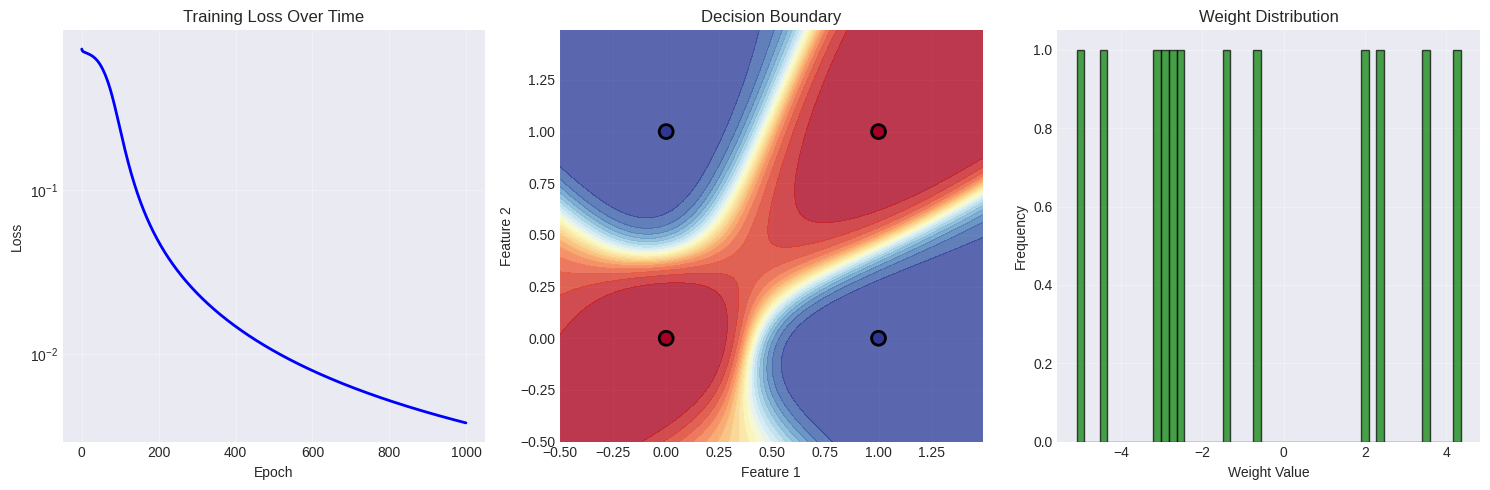


XOR Network Predictions:
Input		Target	Predicted
----------------------------------------
[0 0]	0	0
[0 1]	1	1
[1 0]	1	1
[1 1]	0	0


In [ ]:
# Visualize neural network training
def visualize_nn_training(nn, X, y):
    """
    Create comprehensive visualization of neural network training.
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot 1: Loss curve
    axes[0].plot(nn.loss_history, 'b-', linewidth=2)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training Loss Over Time')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_yscale('log')

    # Plot 2: Decision boundary (for 2D input)
    if X.shape[1] == 2:
        h = 0.01
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

        Z = nn.forward_propagation(np.c_[xx.ravel(), yy.ravel()].T)
        Z = Z.reshape(xx.shape)

        axes[1].contourf(xx, yy, Z, levels=20, cmap=plt.cm.RdYlBu, alpha=0.8)
        axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                       edgecolor='black', s=100, linewidth=2)
        axes[1].set_xlabel('Feature 1')
        axes[1].set_ylabel('Feature 2')
        axes[1].set_title('Decision Boundary')

    # Plot 3: Weight distribution
    all_weights = np.concatenate([W.flatten() for W in nn.weights])
    axes[2].hist(all_weights, bins=50, alpha=0.7, color='green', edgecolor='black')
    axes[2].set_xlabel('Weight Value')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('Weight Distribution')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Visualize XOR network
visualize_nn_training(nn, X_xor, y_xor)

# Test predictions
print("\nXOR Network Predictions:")
print("Input\t\tTarget\tPredicted")
print("-" * 40)
for i in range(len(X_xor)):
    pred = nn.predict(X_xor[i:i+1])[0, 0]
    print(f"{X_xor[i]}\t{y_xor[i]}\t{pred}")

## Part 5: More Complex Example - Circle Classification

Let's test our neural network on a more challenging problem: classifying points inside and outside a circle.

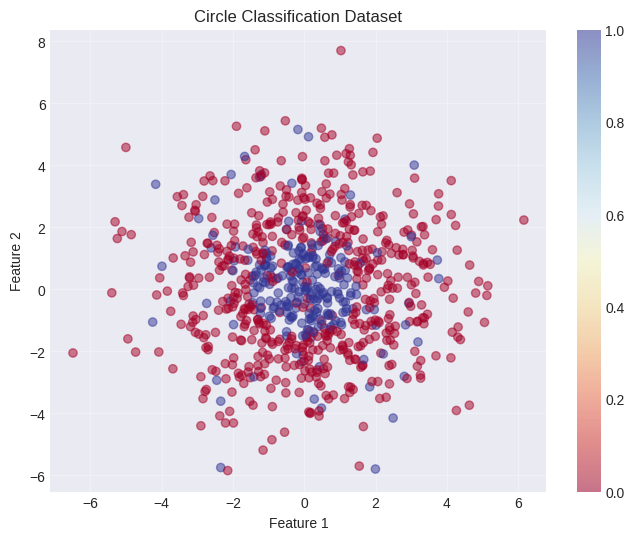

Training neural network on circle dataset...
Epoch 100/1000, Loss: 0.5315, Accuracy: 72.88%
Epoch 200/1000, Loss: 0.5083, Accuracy: 74.50%
Epoch 300/1000, Loss: 0.4933, Accuracy: 77.25%
Epoch 400/1000, Loss: 0.4855, Accuracy: 79.00%
Epoch 500/1000, Loss: 0.4806, Accuracy: 80.62%
Epoch 600/1000, Loss: 0.4757, Accuracy: 82.38%
Epoch 700/1000, Loss: 0.4709, Accuracy: 83.12%
Epoch 800/1000, Loss: 0.4672, Accuracy: 84.50%
Epoch 900/1000, Loss: 0.4650, Accuracy: 84.75%
Epoch 1000/1000, Loss: 0.4636, Accuracy: 85.25%


In [ ]:
# Generate circle dataset
def create_circle_dataset(n_samples=500, noise=0.1):
    """
    Create a dataset where points inside a circle are class 1,
    and points outside are class 0.
    """
    np.random.seed(42)

    # Generate random points
    X = np.random.randn(n_samples, 2) * 2

    # Calculate distance from origin
    distances = np.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Points inside circle (radius = 1.5) are class 1
    y = (distances < 1.5).astype(int)

    # Add some noise to make it more challenging
    noise_mask = np.random.random(n_samples) < noise
    y[noise_mask] = 1 - y[noise_mask]

    return X, y

# Create dataset
X_circle, y_circle = create_circle_dataset(1000)

# Split into train and test
n_train = 800
X_train_circle = X_circle[:n_train]
y_train_circle = y_circle[:n_train]
X_test_circle = X_circle[n_train:]
y_test_circle = y_circle[n_train:]

# Visualize dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train_circle[:, 0], X_train_circle[:, 1],
           c=y_train_circle, cmap=plt.cm.RdYlBu, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circle Classification Dataset')
plt.colorbar()
plt.grid(True, alpha=0.3)
plt.show()

# Train neural network
print("Training neural network on circle dataset...")
nn_circle = NeuralNetwork(
    layer_sizes=[2, 8, 6, 1],  # Deeper network for complex boundary
    activation='relu',
    learning_rate=0.1
)

nn_circle.train(X_train_circle, y_train_circle, epochs=1000, verbose=True)


Model Performance:
Training Accuracy: 85.25%
Test Accuracy: 83.50%


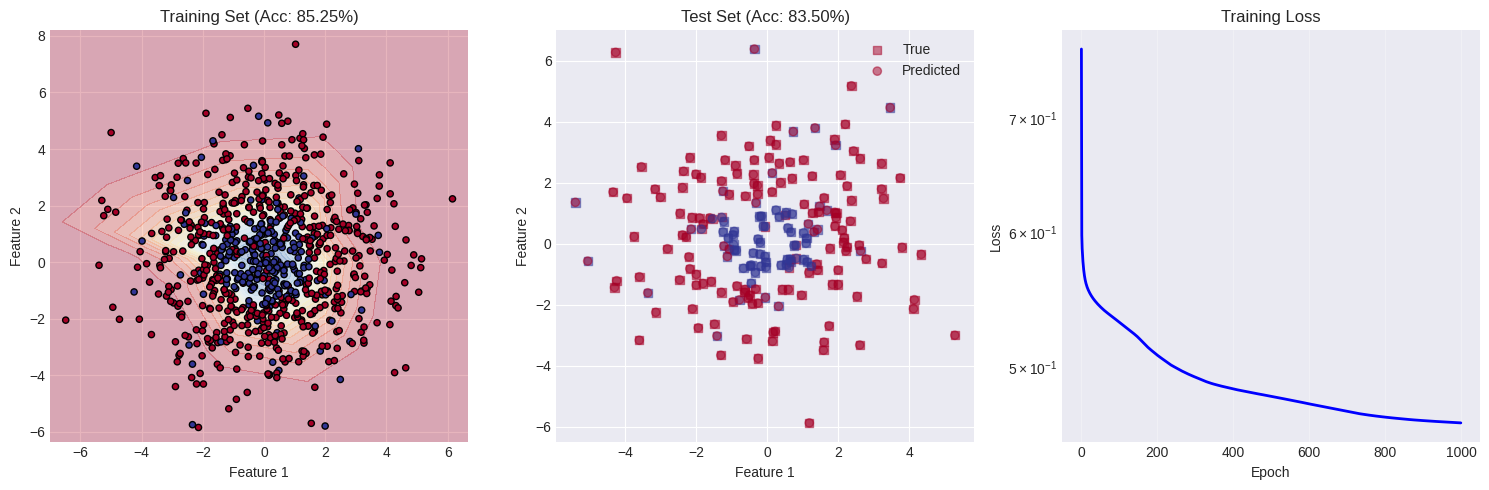

In [ ]:
# Evaluate and visualize results
def evaluate_model(nn, X_train, y_train, X_test, y_test):
    """
    Comprehensive model evaluation with visualizations.
    """
    # Make predictions
    y_pred_train = nn.predict(X_train)
    y_pred_test = nn.predict(X_test)

    # Calculate accuracies
    train_acc = np.mean(y_pred_train.flatten() == y_train)
    test_acc = np.mean(y_pred_test.flatten() == y_test)

    print(f"\nModel Performance:")
    print(f"Training Accuracy: {train_acc:.2%}")
    print(f"Test Accuracy: {test_acc:.2%}")

    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot 1: Training data with decision boundary
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

    Z = nn.forward_propagation(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)

    axes[0].contourf(xx, yy, Z, levels=20, cmap=plt.cm.RdYlBu, alpha=0.3)
    axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                   cmap=plt.cm.RdYlBu, edgecolor='black', s=20)
    axes[0].set_title(f'Training Set (Acc: {train_acc:.2%})')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')

    # Plot 2: Test data predictions
    axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test,
                   cmap=plt.cm.RdYlBu, marker='s', alpha=0.5, label='True')
    axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test.flatten(),
                   cmap=plt.cm.RdYlBu, marker='o', alpha=0.5, label='Predicted')
    axes[1].set_title(f'Test Set (Acc: {test_acc:.2%})')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].legend()

    # Plot 3: Loss curve
    axes[2].plot(nn.loss_history, 'b-', linewidth=2)
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('Loss')
    axes[2].set_title('Training Loss')
    axes[2].grid(True, alpha=0.3)
    axes[2].set_yscale('log')

    plt.tight_layout()
    plt.show()

evaluate_model(nn_circle, X_train_circle, y_train_circle,
              X_test_circle, y_test_circle)

## Part 6: Gradient Descent Variations

### 6.1 Optimization Algorithms

Let's implement and compare different gradient descent variations:

Training with SGD...
Training with MOMENTUM...
Training with ADAM...


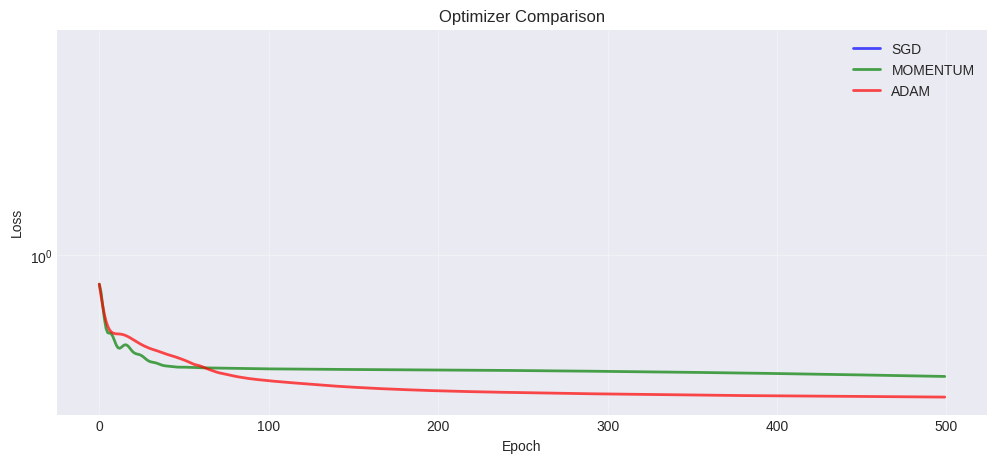

In [ ]:
class OptimizedNeuralNetwork(NeuralNetwork):
    """
    Extended neural network with advanced optimization techniques.
    """

    def __init__(self, *args, optimizer='sgd', **kwargs):
        super().__init__(*args, **kwargs)
        self.optimizer = optimizer

        # Initialize optimizer-specific parameters
        if optimizer == 'momentum':
            self.beta = 0.9
            self.v_weights = [np.zeros_like(W) for W in self.weights]
            self.v_biases = [np.zeros_like(b) for b in self.biases]

        elif optimizer == 'adam':
            self.beta1 = 0.9  # Momentum parameter
            self.beta2 = 0.999  # RMSprop parameter
            self.epsilon = 1e-8
            self.t = 0  # Time step

            # First moment estimates
            self.m_weights = [np.zeros_like(W) for W in self.weights]
            self.m_biases = [np.zeros_like(b) for b in self.biases]

            # Second moment estimates
            self.v_weights = [np.zeros_like(W) for W in self.weights]
            self.v_biases = [np.zeros_like(b) for b in self.biases]

    def update_parameters(self, gradients):
        """
        Update parameters using specified optimizer.
        """
        if self.optimizer == 'sgd':
            # Standard gradient descent
            super().update_parameters(gradients)

        elif self.optimizer == 'momentum':
            # Momentum-based gradient descent
            for l in range(self.n_layers):
                # Update velocity
                self.v_weights[l] = (self.beta * self.v_weights[l] -
                                    self.learning_rate * gradients[f'dW{l+1}'])
                self.v_biases[l] = (self.beta * self.v_biases[l] -
                                   self.learning_rate * gradients[f'db{l+1}'])

                # Update parameters
                self.weights[l] += self.v_weights[l]
                self.biases[l] += self.v_biases[l]

        elif self.optimizer == 'adam':
            # Adam optimizer
            self.t += 1

            for l in range(self.n_layers):
                # Get gradients
                dW = gradients[f'dW{l+1}']
                db = gradients[f'db{l+1}']

                # Update biased first moment estimate
                self.m_weights[l] = self.beta1 * self.m_weights[l] + (1 - self.beta1) * dW
                self.m_biases[l] = self.beta1 * self.m_biases[l] + (1 - self.beta1) * db

                # Update biased second raw moment estimate
                self.v_weights[l] = self.beta2 * self.v_weights[l] + (1 - self.beta2) * (dW ** 2)
                self.v_biases[l] = self.beta2 * self.v_biases[l] + (1 - self.beta2) * (db ** 2)

                # Compute bias-corrected moment estimates
                m_w_corrected = self.m_weights[l] / (1 - self.beta1 ** self.t)
                m_b_corrected = self.m_biases[l] / (1 - self.beta1 ** self.t)
                v_w_corrected = self.v_weights[l] / (1 - self.beta2 ** self.t)
                v_b_corrected = self.v_biases[l] / (1 - self.beta2 ** self.t)

                # Update parameters
                self.weights[l] -= self.learning_rate * m_w_corrected / (np.sqrt(v_w_corrected) + self.epsilon)
                self.biases[l] -= self.learning_rate * m_b_corrected / (np.sqrt(v_b_corrected) + self.epsilon)

# Compare optimizers
def compare_optimizers(X, y, epochs=500):
    """
    Train networks with different optimizers and compare convergence.
    """
    optimizers = ['sgd', 'momentum', 'adam']
    colors = ['blue', 'green', 'red']

    plt.figure(figsize=(12, 5))

    for i, (opt, color) in enumerate(zip(optimizers, colors)):
        print(f"Training with {opt.upper()}...")

        # Create and train network
        nn = OptimizedNeuralNetwork(
            layer_sizes=[2, 8, 4, 1],
            activation='relu',
            learning_rate=0.01 if opt == 'adam' else 0.1,
            optimizer=opt
        )

        nn.train(X, y, epochs=epochs, verbose=False)

        # Plot loss curve
        plt.plot(nn.loss_history, color=color, label=opt.upper(),
                linewidth=2, alpha=0.7)

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Optimizer Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    plt.show()

# Run comparison
compare_optimizers(X_train_circle, y_train_circle)

## Part 7: Practice Exercises

Now it's time to apply what you've learned! Complete the following exercises to deepen your understanding of neural networks.

---

### Exercise 1: Activation Function Analysis
**Task**: Implement the Swish activation function and compare its performance with ReLU.

The Swish function is defined as: $f(x) = x \cdot \sigma(x)$ where $\sigma$ is the sigmoid function.

In [ ]:
# YOUR CODE HERE
# Hint: Add swish and swish_derivative methods to ActivationFunctions class
# Then train two networks on the circle dataset and compare their performance

# Space for your implementation:





### Exercise 2: Learning Rate Exploration
**Task**: Train the same network architecture with different learning rates [0.001, 0.01, 0.1, 1.0] and plot their convergence curves on the same graph.

In [ ]:
# YOUR CODE HERE
# Hint: Use a loop to train multiple networks with different learning rates

# Space for your implementation:





### Exercise 3: Custom Loss Function
**Task**: Implement Mean Squared Error (MSE) loss as an alternative to binary cross-entropy and compare the training dynamics.

In [ ]:
# YOUR CODE HERE
# Hint: MSE = (1/m) * Σ(y_true - y_pred)²
# Remember to also modify the backward propagation accordingly

# Space for your implementation:





### Exercise 4: Network Architecture Design
**Task**: Create a function that automatically determines the optimal number of hidden layers and neurons for a given dataset. Test it on the spiral dataset below.

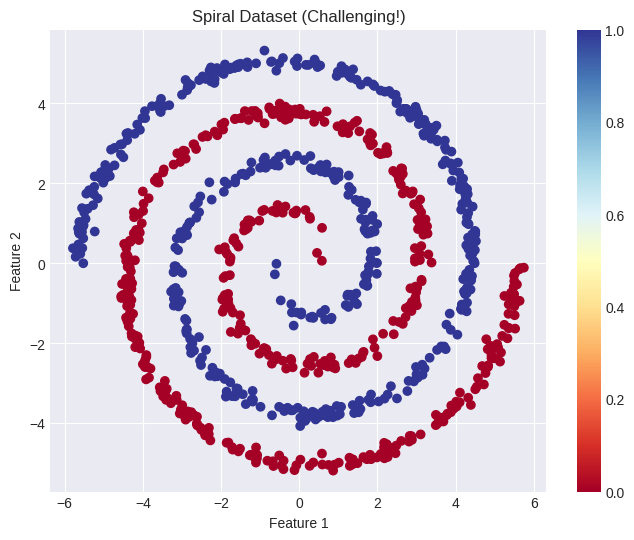

In [ ]:
# Generate spiral dataset (more complex than circle)
def create_spiral_dataset(n_samples=500):
    n = n_samples // 2
    theta = np.sqrt(np.random.rand(n)) * 4 * np.pi

    # First spiral
    r_a = 2 * theta + np.pi
    data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
    x_a = data_a + np.random.randn(n, 2) * 0.5

    # Second spiral
    r_b = -2 * theta - np.pi
    data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T
    x_b = data_b + np.random.randn(n, 2) * 0.5

    X = np.vstack((x_a, x_b))
    y = np.hstack((np.zeros(n), np.ones(n)))

    return X / 5, y.astype(int)  # Scale down

X_spiral, y_spiral = create_spiral_dataset(1000)

# Visualize spiral dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, cmap=plt.cm.RdYlBu)
plt.title('Spiral Dataset (Challenging!)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

# YOUR CODE HERE
# Hint: Try different architectures and use validation accuracy to select the best

# Space for your implementation:





### Exercise 5: Weight Initialization Study
**Task**: Implement and compare different weight initialization strategies:
- Zero initialization
- Random normal initialization
- Xavier/Glorot initialization
- He initialization

Analyze their impact on training speed and final performance.

In [ ]:
# YOUR CODE HERE
# Hint: Modify the __init__ method of NeuralNetwork to accept initialization type

# Space for your implementation:





## Summary and Key Takeaways

### What We've Learned

Through this comprehensive notebook, we've built neural networks from scratch and gained deep insights into:

#### 1. **Perceptrons**
- Basic building blocks of neural networks
- Linear decision boundaries
- Perceptron learning rule

#### 2. **Activation Functions**
- **Sigmoid**: Smooth, differentiable, outputs in (0,1)
- **Tanh**: Zero-centered, outputs in (-1,1)
- **ReLU**: Simple, efficient, avoids vanishing gradients
- **Swish**: Self-gated, smooth, often outperforms ReLU

#### 3. **Forward Propagation**
- Layer-by-layer computation
- Matrix operations for efficiency
- Caching intermediate values for backpropagation

#### 4. **Backpropagation**
- Chain rule application
- Gradient computation through layers
- Efficient reverse-mode differentiation

#### 5. **Gradient Descent Variations**
- **SGD**: Simple but can be slow
- **Momentum**: Accelerates convergence
- **Adam**: Adaptive learning rates, robust

#### 6. **Practical Considerations**
- **Learning rate**: Critical hyperparameter
- **Initialization**: He for ReLU, Xavier for sigmoid/tanh
- **Architecture**: Depth vs width tradeoffs
- **Loss functions**: BCE for classification, MSE for regression

### Key Mathematical Concepts

1. **Chain Rule**: Foundation of backpropagation
   $\frac{\partial L}{\partial W^{[l]}} = \frac{\partial L}{\partial Z^{[l]}} \cdot \frac{\partial Z^{[l]}}{\partial W^{[l]}}$

2. **Gradient Descent Update**:
   $W = W - \alpha \nabla_W L$

3. **Universal Approximation**: Neural networks can approximate any continuous function

### Best Practices

1. **Start simple**: Begin with small networks and scale up
2. **Monitor loss**: Watch for convergence or divergence
3. **Validate regularly**: Use validation set to detect overfitting
4. **Experiment**: Try different architectures and hyperparameters
5. **Visualize**: Plot decision boundaries and loss curves

### Next Steps

To continue your neural network journey:

1. **Regularization**: L1/L2 penalties, dropout, batch normalization
2. **Convolutional Networks**: For image processing
3. **Recurrent Networks**: For sequential data
4. **Transfer Learning**: Using pre-trained models
5. **Deep Learning Frameworks**: TensorFlow, PyTorch, JAX

---

## Additional Resources

### Recommended Reading
- "Deep Learning" by Goodfellow, Bengio, and Courville
- "Neural Networks and Deep Learning" by Michael Nielsen
- "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman

### Online Courses
- Fast.ai Practical Deep Learning
- Stanford CS231n: Convolutional Neural Networks
- MIT 6.034: Artificial Intelligence

### Papers to Explore
- "Gradient-Based Learning Applied to Document Recognition" (LeCun et al., 1998)
- "ImageNet Classification with Deep Convolutional Neural Networks" (Krizhevsky et al., 2012)
- "Attention Is All You Need" (Vaswani et al., 2017)

---

## Acknowledgments

This notebook was created for educational purposes. The implementations prioritize clarity and understanding over computational efficiency. For production use, consider established deep learning frameworks.

**Remember**: The journey to mastering neural networks is iterative. Each implementation teaches something new. Keep experimenting, keep learning!

---

*End of Module: Neural Networks Fundamentals*